In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# This magic directive ensures, that our matplotlib plots will be drawn into our notebook
%matplotlib inline

---

**`drinks.csv` is a dataset containing information about alcohol consumption in different countries**

> "The results show how many glasses of wine, cans of beer and shots of spirits were drunk per person in each country in 2010. "

Numeric operations on dataframes

In [5]:
drinks = pd.read_table('datasets/drinks.csv', sep=',')
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan            0.0                0              0   
1      Albania           89.0              132             54   
2      Algeria           25.0                0             14   
3      Andorra          245.0              138            312   
4       Angola          217.0               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9

Select the top 10 countries with the highest alcohol consumption

In [6]:
top_10 = drinks.sort_values('total_litres_of_pure_alcohol', ascending=False).head(10)
top_10

country  beer_servings  spirit_servings  wine_servings  \
15              Belarus          142.0              373             42   
98            Lithuania          343.0              244             56   
3               Andorra          245.0              138            312   
68              Grenada          199.0              438             28   
61               France          127.0              151            370   
45       Czech Republic          361.0              170            134   
141  Russian Federation          247.0              326             73   
99           Luxembourg          236.0              133            271   
81              Ireland          313.0              118            165   
155            Slovakia          196.0              293            116   

     total_litres_of_pure_alcohol  
15                           14.4  
98                           12.9  
3                            12.4  
68                           11.9  
61                           11.8  
45                           11.8  
141                          11.5  
99                           11.4  
81                           11.4  
155                          11.4

Let's do the data visualization in `matplotlib`

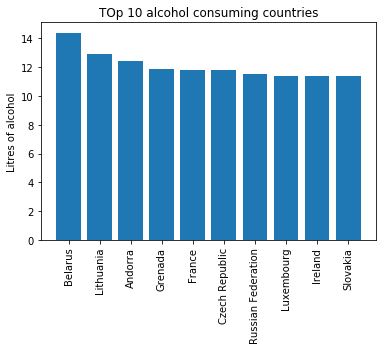

In [11]:
fig, ax = plt.subplots()

ax.bar(top_10['country'],
       top_10['total_litres_of_pure_alcohol'])
ax.set_xticklabels(labels=top_10['country'],
                   rotation=90)
ax.set_ylabel('Litres of alcohol')
ax.set_title('TOp 10 alcohol consuming countries')

plt.show()

Select the countries with 0 alcohol consumption

In [51]:
drinks.loc[drinks['total_litres_of_pure_alcohol'] == 0]

country  beer_servings  spirit_servings  wine_servings  \
0         Afghanistan            0.0                0              0   
13         Bangladesh            0.0                0              0   
46        North Korea            0.0                0              0   
79               Iran            0.0                0              0   
90             Kuwait            0.0                0              0   
97              Libya            0.0                0              0   
103          Maldives            0.0                0              0   
106  Marshall Islands            0.0                0              0   
107        Mauritania            0.0                0              0   
111            Monaco            0.0                0              0   
128          Pakistan            0.0                0              0   
147        San Marino            0.0                0              0   
158           Somalia            0.0                0              0   

     total_litres_of_pure_alcohol  
0                             0.0  
13                            0.0  
46                            0.0  
79                            0.0  
90                            0.0  
97                            0.0  
103                           0.0  
106                           0.0  
107                           0.0  
111                           0.0  
128                           0.0  
147                           0.0  
158                           0.0

Select rows, where data value is NaN

In [16]:
nan_rows = pd.isnull(drinks['beer_servings'])
drinks[nan_rows]

country  beer_servings  spirit_servings  wine_servings  \
0             Afghanistan            0.0                0              0   
1                 Albania           89.0              132             54   
2                 Algeria           25.0                0             14   
3                 Andorra          245.0              138            312   
4                  Angola          217.0               57             45   
5       Antigua & Barbuda          102.0              128             45   
6               Argentina          193.0               25            221   
8               Australia          261.0               72            212   
9                 Austria          279.0               75            191   
10             Azerbaijan           21.0               46              5   
11                Bahamas          122.0              176             51   
12                Bahrain           42.0               63              7   
13             Bangladesh            0.0                0              0   
14               Barbados          143.0              173             36   
15                Belarus          142.0              373             42   
16                Belgium          295.0               84            212   
17                 Belize          263.0              114              8   
18                  Benin           34.0                4             13   
19                 Bhutan           23.0                0              0   
20                Bolivia          167.0               41              8   
21     Bosnia-Herzegovina           76.0              173              8   
22               Botswana          173.0               35             35   
23                 Brazil          245.0              145             16   
24                 Brunei           31.0                2              1   
25               Bulgaria          231.0              252             94   
26           Burkina Faso           25.0                7              7   
27                Burundi           88.0                0              0   
28          Cote d'Ivoire           37.0                1              7   
29             Cabo Verde          144.0               56             16   
30               Cambodia           57.0               65              1   
..                    ...            ...              ...            ...   
163              Suriname          128.0              178              7   
164             Swaziland           90.0                2              2   
165                Sweden          152.0               60            186   
166           Switzerland          185.0              100            280   
167                 Syria            5.0               35             16   
168            Tajikistan            2.0               15              0   
169              Thailand           99.0              258              1   
170             Macedonia          106.0               27             86   
171           Timor-Leste            1.0                1              4   
172                  Togo           36.0                2             19   
173                 Tonga           36.0               21              5   
174     Trinidad & Tobago          197.0              156              7   
175               Tunisia           51.0                3             20   
176                Turkey           51.0               22              7   
177          Turkmenistan           19.0               71             32   
178                Tuvalu            6.0               41              9   
179                Uganda           45.0                9              0   
180               Ukraine          206.0              237             45   
181  United Arab Emirates           16.0              135              5   
182        United Kingdom          219.0              126            195   
183              Tanzania           36.0                6         

> by using `inplace=False` performs the modification and returns a new object. While `inplace=True` modifies the original object in place

In [53]:
#This cell deletes every row containing an NaN value form the dataset

drinks.dropna(inplace=True)

# OR

drinks = drinks.dropna()

> **Note:** By dropping these NaN rows, we can lose lot of useful information. Another approach would be to replace these NaN values with numeric values (either 0, or approximating the value)

**Let's determine how many servings were consumed overall in 2010**

In [54]:
drinks[['beer_servings', 'spirit_servings', 'wine_servings']].sum()

beer_servings      20371.0
spirit_servings    15261.0
wine_servings       9525.0
dtype: float64

Let's find the top 10 beer consuming countries

In [55]:
drinks.sort_values('beer_servings', ascending=False).head(10)

country  beer_servings  spirit_servings  wine_servings  \
117         Namibia          376.0                3              1   
45   Czech Republic          361.0              170            134   
62            Gabon          347.0               98             59   
65          Germany          346.0              117            175   
98        Lithuania          343.0              244             56   
135          Poland          343.0              215             56   
188       Venezuela          333.0              100              3   
81          Ireland          313.0              118            165   
129           Palau          306.0               63             23   
140         Romania          297.0              122            167   

     total_litres_of_pure_alcohol  
117                           6.8  
45                           11.8  
62                            8.9  
65                           11.3  
98                           12.9  
135                          10.9  
188                           7.7  
81                           11.4  
129                           6.9  
140                          10.4

What if I want to see only the Country, beer_servings and total_litres_of_pure_alcohol in the resulting dataset?

In [23]:
column_selection = ['country',
                    'beer_servings',
                    'total_litres_of_pure_alcohol']

sorted_beer = drinks.sort_values('beer_servings', ascending=False)
top10_beer = sorted_beer.iloc[:10, :]
top10_selection = top10_beer.loc[:, column_selection]

top10_selection

country  beer_servings  total_litres_of_pure_alcohol
117         Namibia          376.0                           6.8
45   Czech Republic          361.0                          11.8
62            Gabon          347.0                           8.9
65          Germany          346.0                          11.3
98        Lithuania          343.0                          12.9
135          Poland          343.0                          10.9
188       Venezuela          333.0                           7.7
81          Ireland          313.0                          11.4
129           Palau          306.0                           6.9
140         Romania          297.0                          10.4

Top 10 wine consuming countries:

In [57]:
drinks.sort_values('wine_servings', ascending=False).head(10)

country  beer_servings  spirit_servings  wine_servings  \
61              France          127.0              151            370   
136           Portugal          194.0               67            339   
3              Andorra          245.0              138            312   
166        Switzerland          185.0              100            280   
48             Denmark          224.0               81            278   
156           Slovenia          270.0               51            276   
99          Luxembourg          236.0              133            271   
42             Croatia          230.0               87            254   
83               Italy           85.0               42            237   
55   Equatorial Guinea           92.0                0            233   

     total_litres_of_pure_alcohol  
61                           11.8  
136                          11.0  
3                            12.4  
166                          10.2  
48                           10.4  
156                          10.6  
99                           11.4  
42                           10.2  
83                            6.5  
55                            5.8

Top 10 spirit consuming countries:

In [58]:
drinks.sort_values('spirit_servings', ascending=False).head(10)

country  beer_servings  spirit_servings  wine_servings  \
68              Grenada          199.0              438             28   
15              Belarus          142.0              373             42   
73                Haiti            1.0              326              1   
141  Russian Federation          247.0              326             73   
144           St. Lucia          171.0              315             71   
72               Guyana           93.0              302              1   
155            Slovakia          196.0              293            116   
50             Dominica           52.0              286             26   
169            Thailand           99.0              258              1   
40         Cook Islands            0.0              254             74   

     total_litres_of_pure_alcohol  
68                           11.9  
15                           14.4  
73                            5.9  
141                          11.5  
144                          10.1  
72                            7.1  
155                          11.4  
50                            6.6  
169                           6.4  
40                            5.9

    Let's make a bar chart out of this

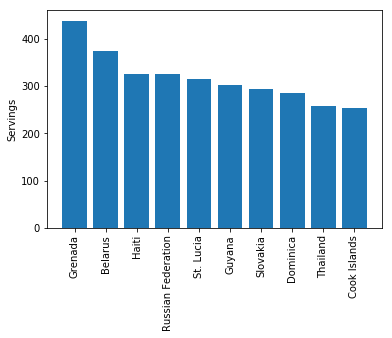

In [59]:
top_10_spirit = drinks.sort_values('spirit_servings',
                                   ascending=False).head(10)

fig, ax = plt.subplots()

ax.bar(top_10_spirit['country'],
       top_10_spirit['spirit_servings'])
ax.set_xticklabels(labels=top_10_spirit['country'],
                   rotation=90)
ax.set_ylabel('Servings')

plt.show()

You might ask: Can we make a function which receives the name of the columns and returns a bar chart for the top 10 from that column?

In [60]:
def plot_column_top_10(column_name, chart_title=''):
    top_10_set = drinks.sort_values(column_name, ascending=False).head(10)
    
    fig, ax = plt.subplots()

    ax.bar(top_10_set['country'],
           top_10_set[column_name])
    ax.set_xticklabels(labels=top_10_set['country'],
                       rotation=90)
    ax.set_ylabel('Servings')
    ax.set_title(chart_title)

    plt.show()

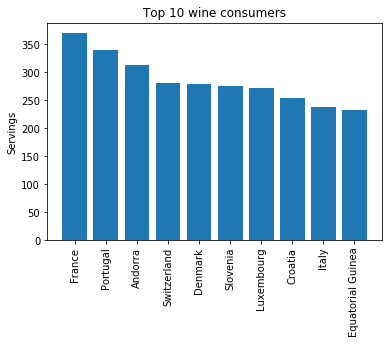

In [61]:
plot_column_top_10('wine_servings', 'Top 10 wine consumers')

Normalize a column

- After normalization the highest value will be 1.0 and the lowest 0.0

In [33]:
max_beer = drinks['beer_servings'].max()
min_beer = drinks['beer_servings'].min()

drinks['norm_beer_servings'] = (drinks['beer_servings'] - min_beer) / (max_beer - min_beer)

In [44]:
max_spirit = drinks['spirit_servings'].max()
min_spirit = drinks['spirit_servings'].min()

drinks['norm_spirit_servings'] = (drinks['spirit_servings'] - min_spirit) / (max_spirit - min_spirit)

In [34]:
drinks.describe()

beer_servings  spirit_servings  wine_servings  \
count     190.000000       193.000000     193.000000   
mean      107.215789        80.994819      49.450777   
std       101.527283        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.250000         4.000000       1.000000   
50%        76.000000        56.000000       8.000000   
75%       191.000000       128.000000      59.000000   
max       376.000000       438.000000     370.000000   

       total_litres_of_pure_alcohol  temporary  norm_beer_servings  
count                    190.000000      193.0          190.000000  
mean                       4.742632        0.0            0.285148  
std                        3.790007        0.0            0.270019  
min                        0.000000        0.0            0.000000  
25%                        1.300000        0.0            0.053856  
50%                        4.250000        0.0            0.202128  
75%                        7.200000        0.0            0.507979  
max                       14.400000        0.0            1.000000

In [35]:
drinks['norm_beer_servings'].describe()

count    190.000000
mean       0.285148
std        0.270019
min        0.000000
25%        0.053856
50%        0.202128
75%        0.507979
max        1.000000
Name: norm_beer_servings, dtype: float64

Let's put the values from the newly created normalized column into a histogram

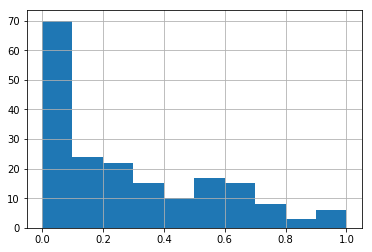

In [37]:
drinks['norm_beer_servings'].hist()

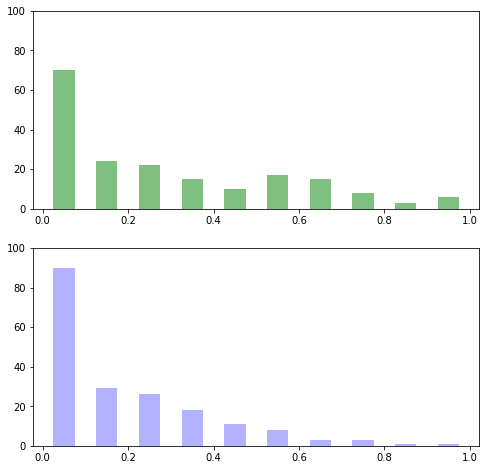

In [53]:
fig, ax = plt.subplots(2,1, figsize=(8, 8))

ax[0].hist(drinks['norm_beer_servings'],
        rwidth=0.5,
        facecolor='green',
        alpha=0.5,
        bins=10)
ax[1].hist(drinks['norm_spirit_servings'],
        rwidth=0.5,
        facecolor='blue',
        alpha=0.3,
        bins=10)

ax[0].set_ylim([0, 100])
ax[1].set_ylim([0, 100])

plt.show()

---

### Flights dataset

What is dataset about? 
> It comprises monthly totals for airline passengers from 1949 to 1960 on a specific route

How to create pivot tables and heatmaps

In [54]:
flights_data = pd.read_csv('datasets/flights.csv')
flights_data.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

As you can see the dataset represents passenger numbers on a monthly basis from 1949 to 1960

What if we want to transform the dataset and show the years as columns and the months as rows (or vice-versa)?
We can use pivot tables to achieve this state

In [55]:
monthly_flights = flights_data.pivot(values='passengers',
                                     index='month',
                                     columns='year')
monthly_flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
April       129   135   163   181   235   227   269   313   348   348   396   
August      148   170   199   242   272   293   347   405   467   505   559   
December    118   140   166   194   201   229   278   306   336   337   405   
February    118   126   150   180   196   188   233   277   301   318   342   
January     112   115   145   171   196   204   242   284   315   340   360   
July        148   170   199   230   264   302   364   413   465   491   548   
June        135   149   178   218   243   264   315   374   422   435   472   
March       132   141   178   193   236   235   267   317   356   362   406   
May         121   125   172   183   229   234   270   318   355   363   420   
November    104   114   146   172   180   203   237   271   305   310   362   
October     119   133   162   191   211   229   274   306   347   359   407   
September   136   158   184   209   237   259   312   355   404   404   463   

year       1960  
month            
April       461  
August      606  
December    432  
February    391  
January     417  
July        622  
June        535  
March       419  
May         472  
November    390  
October     461  
September   508

It doesn't look bad, but the the months are in alphabetical order

In [56]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_flights = monthly_flights.reindex(index=month_order)
monthly_flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

In [57]:
yearly_flights = flights_data.pivot(values='passengers',
                                    index='year',
                                    columns='month')
yearly_flights = yearly_flights.reindex(month_order, axis=1)
yearly_flights

month  January  February  March  April  May  June  July  August  September  \
year                                                                         
1949       112       118    132    129  121   135   148     148        136   
1950       115       126    141    135  125   149   170     170        158   
1951       145       150    178    163  172   178   199     199        184   
1952       171       180    193    181  183   218   230     242        209   
1953       196       196    236    235  229   243   264     272        237   
1954       204       188    235    227  234   264   302     293        259   
1955       242       233    267    269  270   315   364     347        312   
1956       284       277    317    313  318   374   413     405        355   
1957       315       301    356    348  355   422   465     467        404   
1958       340       318    362    348  363   435   491     505        404   
1959       360       342    406    396  420   472   548     559        463   
1960       417       391    419    461  472   535   622     606        508   

month  October  November  December  
year                                
1949       119       104       118  
1950       133       114       140  
1951       162       146       166  
1952       191       172       194  
1953       211       180       201  
1954       229       203       229  
1955       274       237       278  
1956       306       271       306  
1957       347       305       336  
1958       359       310       337  
1959       407       362       405  
1960       461       390       432

This table is not very intuitive, it is really hard to navigate in it. Hard to find maximums and minimums. And we are just talking about 12 years, what if the history would be much longer? 

This is where heatmaps comes into play:

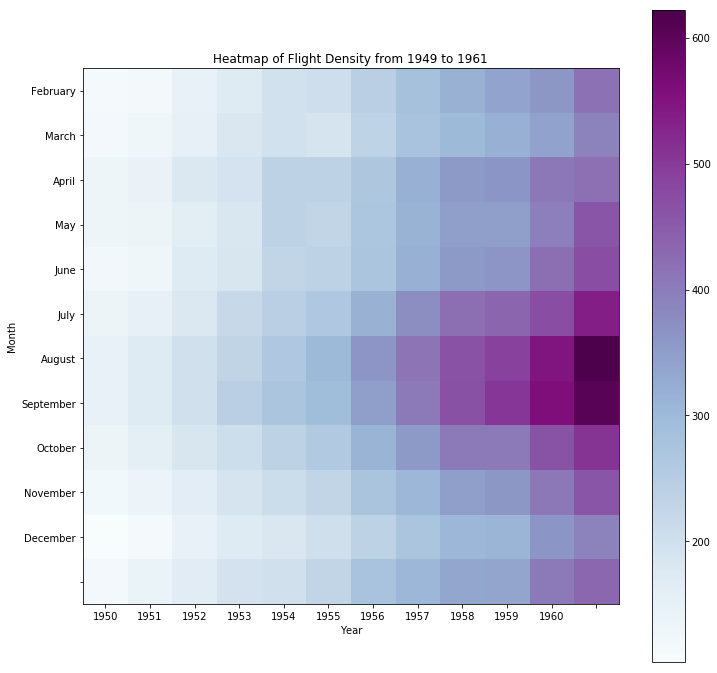

In [61]:
fig, ax = plt.subplots(figsize=(12,12))
heatplot = ax.imshow(monthly_flights, cmap='BuPu')
ax.set_xticklabels(monthly_flights.columns)
ax.set_yticklabels(monthly_flights.index)


tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Heatmap of Flight Density from 1949 to 1961")
ax.set_xlabel('Year')
ax.set_ylabel('Month')

plt.colorbar(heatplot)
plt.show()

From the heatmap we can clearly see that August of 1962 was the most frequent month in our dataset

---

How to apply mathemathical calculations column-wise and row-wise?

In [62]:
# if we don't specify the axis parameter, the default value is set to 0 (means column wise)

yearly_flights.apply(np.sum)

month
January      2901
February     2820
March        3242
April        3205
May          3262
June         3740
July         4216
August       4213
September    3629
October      3199
November     2794
December     3142
dtype: int64

In [63]:
# Apply sum row-wise

yearly_flights.apply(np.sum, axis=1)

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

You can even use your custom functions

Let's create a function which calculates the difference between the largest and smallest value in a column (or a row)

In [64]:
def biggest_difference(series):
    max_val = series.max()
    min_val = series.min()
    return max_val - min_val

In [65]:
# Apply our custom function column-wise

yearly_flights.apply(biggest_difference, axis=0)

month
January      305
February     273
March        287
April        332
May          351
June         400
July         474
August       458
September    372
October      342
November     286
December     314
dtype: int64

In [74]:
# Apply the function row-wise

yearly_flights.apply(biggest_difference, axis=1)

year
1949     44
1950     56
1951     54
1952     71
1953     92
1954    114
1955    131
1956    142
1957    166
1958    195
1959    217
1960    232
dtype: int64

---